#ANALYSIS OF ELECTRIC CAR USAGE

#UNDERSTANDING CONTEXT
Electric car sharing is a service that allows people to borrow and return elctric cars.Based on the data collected,I shall analyse it and investigate a claim about blue cars

PROCEDURE

1.Data preparation:
Here, data will be loaded, viewed and cleaned

2.Exploratory data analysis(univariate and bivariate)

3.Hypothesis testing.

#DATA PREPARATION

1.Loading data

In [59]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline


2.Viewing data

In [ ]:
#loading  to be analysed
data=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


3.Cleaning data

In [ ]:
#drop index column
data.reset_index(drop=True, inplace=True)
data

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
#check for null values
data.isnull().sum()

#There are no null values

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
#check for duplicates
data.duplicated().sum()

#there are no duplicates

0

In [ ]:
#renaming columns.
data.columns = ['p_code',	'date',	'daily_points','day', 'day_type', 'b_taken',
                'b_returned',	'u_taken', 'u_returned', 'u14_taken',	'U14_returned',	'Slots_freed_sum', 'Slots_taken_sum']
data

,p_code,date,daily_points,day,day_type,b_taken,b_returned,u_taken,u_returned,u14_taken,U14_returned,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
#drop column that will not be useful in the analysis
data.drop([	'u_taken', 'u_returned', 'u14_taken', 'U14_returned', 'Slots_freed_sum', 'Slots_taken_sum'], axis=1, inplace= True)
data

,p_code,date,daily_points,day,day_type,b_taken,b_returned
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117
...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10
16081,95880,6/16/2018,1440,5,weekend,19,19
16082,95880,6/17/2018,1440,6,weekend,33,35
16083,95880,6/18/2018,1440,0,weekday,11,14


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


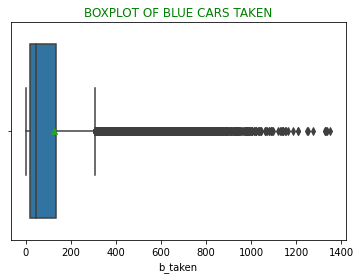

In [ ]:
sns.boxplot(data['b_taken'], showmeans=True)
plt.title('BOXPLOT OF BLUE CARS TAKEN' ,color='g')
plt.show()

#outliers are present

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


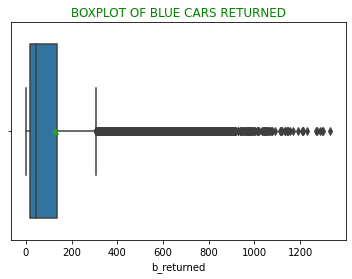

In [ ]:
sns.boxplot(data['b_returned'], showmeans=True)
plt.title('BOXPLOT OF BLUE CARS RETURNED' ,color='g')
plt.show()

#There are some outliers

#EXPLORATORY DATA ANALYSIS


1.Univarite

In [ ]:
#get information about the dataset
#get a descriptive summary of the data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   p_code        16085 non-null  int64 
 1   date          16085 non-null  object
 2   daily_points  16085 non-null  int64 
 3   day           16085 non-null  int64 
 4   day_type      16085 non-null  object
 5   b_taken       16085 non-null  int64 
 6   b_returned    16085 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 879.8+ KB


,p_code,daily_points,day,b_taken,b_returned
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714
std,7647.342000,33.212050,2.008378,185.426579,185.501535
min,75001.000000,1174.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000


In [ ]:
#frequency distribution
data.day.value_counts()

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: day, dtype: int64

In [ ]:
#mean
data['b_returned'].mean()

125.912713708424

In [ ]:
#mode
data['daily_points'].mode().sum()

1440

In [ ]:
#
mediandata['b_taken'].median()

46.0

In [ ]:
#variance
data['b_taken'].var()

34383.01611333789

In [ ]:
#skewness
data['b_taken'].skew()

2.4063548974959086

In [ ]:
#kurtosis
data['b_taken'].kurt()

6.172692305510042

In [ ]:
#quartiles
data['b_returned'].quantile([0.25, 0.5, 0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: b_returned, dtype: float64

In [ ]:
#
rangehighest = data['daily_points'].max()
lowest = data['daily_points'].min()
highest - lowest

266

Text(0.5, 1.0, 'BAR CHART OF DAYS OF THE WEEK')

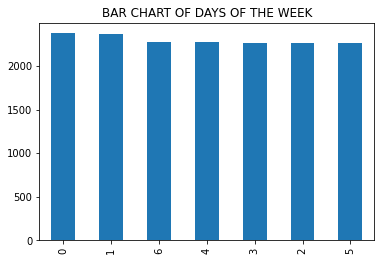

In [ ]:
#bar chart
data.day.value_counts().plot.bar()
plt.title('BAR CHART OF DAYS OF THE WEEK')

The first two days recorded a higher number than the others

Text(0.5, 1.0, 'PIE CHART OF WEEKEND VS WEEKday')

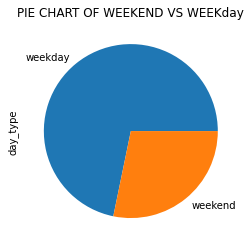

In [ ]:
data.day_type.value_counts().plot(kind= 'pie')
plt.title('PIE CHART OF WEEKEND VS WEEKday')



Text(0.5, 1.0, 'BAR CHART OF DAYS OF THE WEEK')

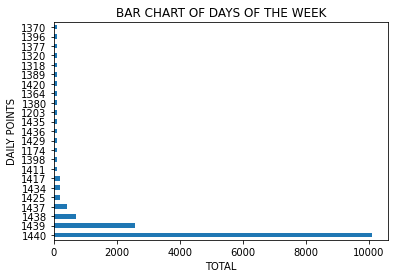

In [87]:
#bar graph
data.daily_points.value_counts().plot.barh()
plt.xlabel('TOTAL')
plt.ylabel('DAILY POINTS')
plt.title('BAR CHART OF DAYS OF THE WEEK')

2.Bivariate analysis

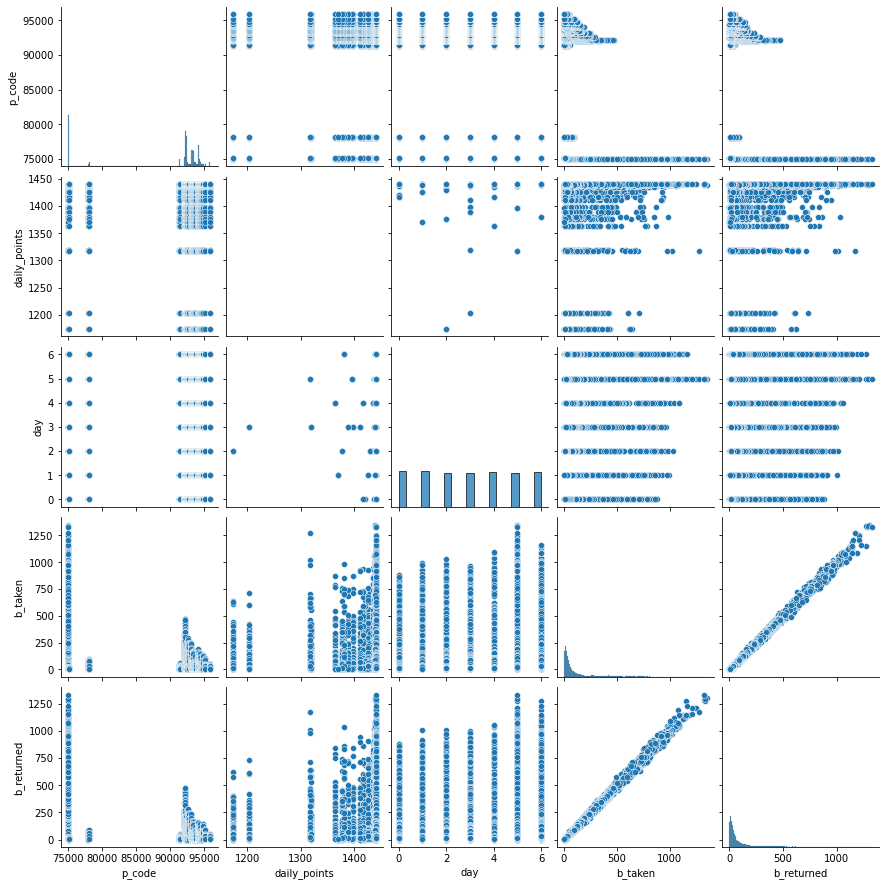

In [ ]:
#combined scatter graph showing relationship between all variables 
sns.pairplot(data)
plt.show()

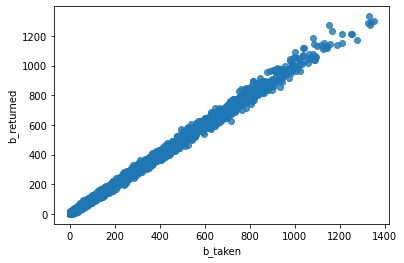

In [ ]:
#scatter graph
# there seems to be a correlation
sns.regplot(x = data["b_taken"], y = data["b_returned"], fit_reg=False)

Challenge result

In [83]:
#pearson correlation
#pearson coefficient is more than 0.50 confirming a strong correlation
data["b_taken"].corr(data["b_returned"]) 

0.9986597051672196

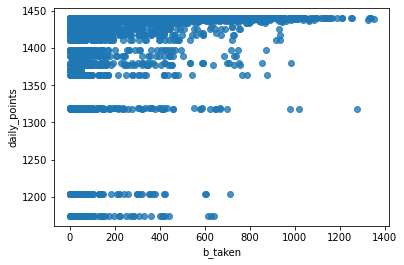

In [81]:
#Scatter plot.
#There is a correlation
sns.regplot(x = data["b_taken"], y = data["daily_points"], fit_reg=False)

Challenge results

In [84]:
#The person coefficient falls between .20 and .50
# This confirms a correlation, although weak.
data["b_taken"].corr(data["daily_points"]) 

0.029410507961460938

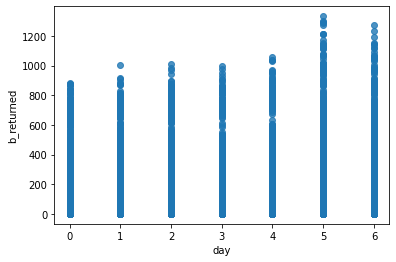

In [82]:
#Scatter plot
#There is barely any correlation
sns.regplot(x = data["day"], y = data["b_returned"], fit_reg=False)

Challenge result

In [85]:
#The pearson coefficient is below .20
# This confirms that there is very weak correlation
data["day"].corr(data["b_returned"]) 

0.08195445794154736

<function matplotlib.pyplot.show>

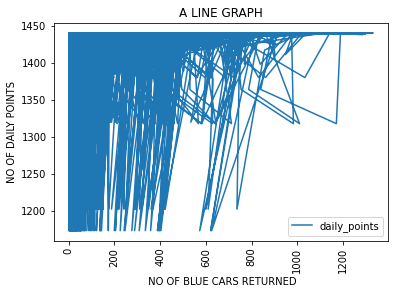

In [88]:
#Line graph
grouped.plot(x='b_returned', y='daily_points', rot=90)
plt.xlabel(' NO OF BLUE CARS RETURNED')
plt.ylabel('NO OF DAILY POINTS')
plt.title('A LINE GRAPH')
plt.show

<function matplotlib.pyplot.show>

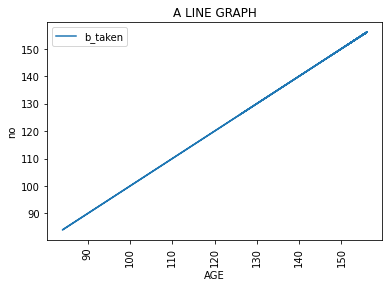

In [ ]:
#line graph shows a positive correlation
grouped = data.groupby(['p_code']).count().reset_index()
grouped.plot(x='day', y='b_taken', rot=90)
plt.xlabel('AGE')
plt.ylabel('no')
plt.title('A LINE GRAPH')
plt.show

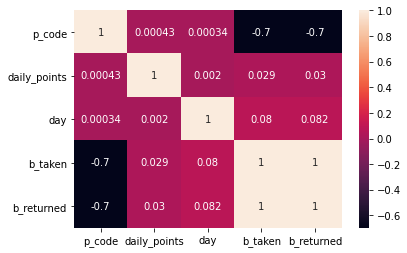

In [ ]:
#The heatmap
sns.heatmap(data.corr(),annot=True)
plt.show()

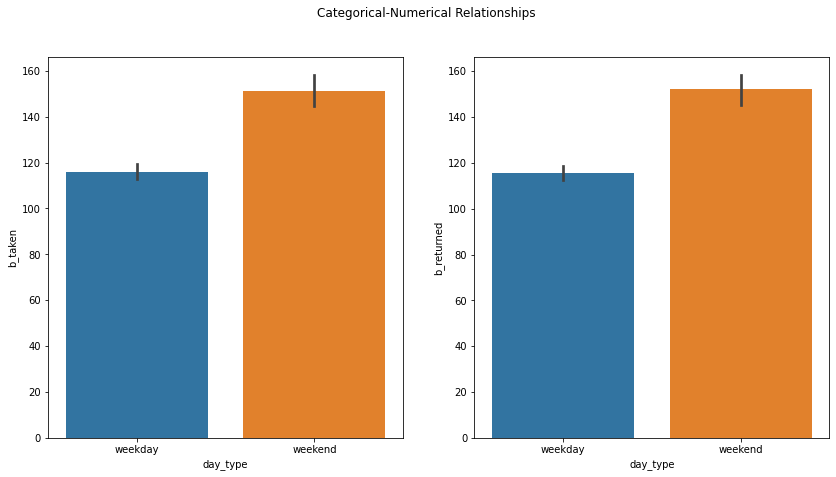

In [ ]:
#Combined bar chart
#Weekends have more cars than on weekdays
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x=data.day_type, y= data.b_taken, ax=ax1)
sns.barplot(x=data.day_type, y=data.b_returned, ax=ax2)
plt.show()


#HYPOTHESIS TESTING

1.State the null hypothesis and alternate hypothesis.

In [ ]:
#mean of our data
datamean=data['b_taken'].mean()
datamean

125.92695057506994

From our univariate analysis, mean of the data was 125.92695


* Ho : mean of  blue cars taken = 125.92695
* H1 : mean of blue cars taken != 125.92695



2. Get sample

In [71]:
import random
# Selecting the sample 
hypo_sample = data.sample(n = 40, replace="False")
hypo_sample.head()

,p_code,date,daily_points,day,day_type,b_taken,b_returned
4280,91400,3/14/2018,1440,2,weekday,9,6
9362,92500,1/20/2018,1439,5,weekend,188,175
15784,95870,1/12/2018,1439,4,weekday,15,10
15712,95100,4/9/2018,1440,0,weekday,35,38
11615,93350,5/8/2018,1425,1,weekday,20,16


3. Identify test statistic

z test will be used because the sample size is more than 30

4. Set Alpha

alpha = 0.05, for a two tail test, then we divide this by two. alpha is now 0.025

5. Obtain critical z value from z score

value of z for 0.025 from the z score is + or - 1.96

5.Analyse data 

In [72]:
#mean of our sample
samplemean=hypo_sample['b_taken'].mean()
samplemean

106.2

In [75]:
#hypothesised mean
datamean=data['b_taken'].mean()
datamean

125.92695057506994

In [76]:
#standard deviation of our data(population)
std_data=data['b_taken'].std()
std_data

185.42657876727893

6. Get p-value

In [77]:
import math
N =40
(samplemean - datamean)/(std_data/math.sqrt(N))

-0.6728495507117408

7.Analyse results

* critical value is -1.96

*  observed value -0.672849  



 The observed p-value is within range of the critical value.

HYPOTHESIS SENSITIVITY

In [110]:
# Selecting the sample 
hypo_sample2 = data.sample(n = 20, replace="False")
hypo_sample2.head()
#mean of our new sample
samplemean2=hypo_sample2['b_taken'].mean()
samplemean2

122.8

In [112]:
import math
N =20
(samplemean2 - datamean)/(std_data/math.sqrt(N))

-0.16863551039219918

NOTE THAT EVERY TIME YOU RUN THESE TWO CELLS, A NEW SAMPLE SIZE IS GENERATED BUT IT STILL FALLS UNDER THE CRITICAL RANGE OF -1.96 TO +1.96

#**CONCLUSION**

I FAIL TO REJECT THE NULL HYPOTHESIS 

There is enough statistical evidence that leads me to fail to reject the null hypothesis.